### Wine Quality - Random Forest
Adapted from https://www.r-bloggers.com/predicting-wine-quality-using-random-forests/

I have an experiment on going with http://www.theshopagora.com/ where I am collecting SPME-GCMS data of wine club wine and evaluating wine with more qualitatively descriptive data than simply a quality score from 1-10. I will run some GCMS feature selection code to produce a simple peak table that can be imported the same way as this simple example data. Each column in the new data set with be a specific chemical species.

In [1]:
wine <- read.table("./winequality-white.csv", sep=";", header=T)
head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


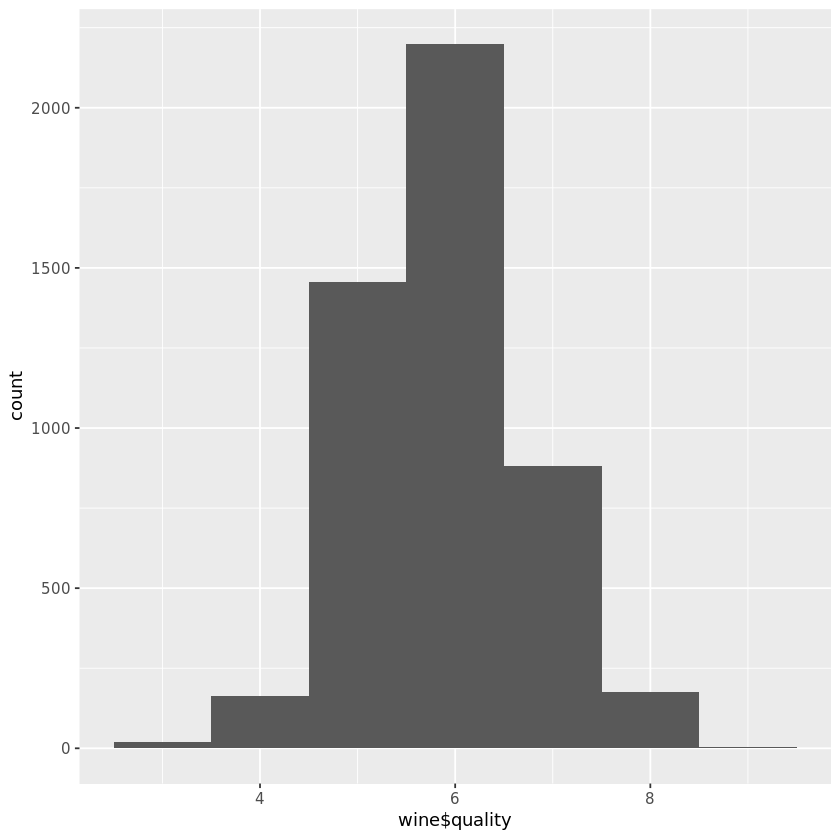

In [2]:
library(ggplot2)
qplot(wine$quality, geom="histogram", binwidth=1)

What a convieniently nice parametric distribution around 6. Let’s arbitrarily classify the wines into good, bad, and normal based on their quality. Less than 6 is bad, more than 6 is good, and 6 is normal.

In [3]:
wine$taste <- ifelse(wine$quality < 6, 'bad', 'good')
wine$taste[wine$quality == 6] <- 'normal'
wine$taste <- as.factor(wine$taste)

Let’s separate our data into testing and training sets.

In [4]:
table(wine$taste)
set.seed(123)
samp <- sample(nrow(wine), 0.6 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]
# 60% of the observations into training set and 40% into test.


   bad   good normal 
  1640   1060   2198 

### Run the Model: Random Forest
---

In [6]:
library(randomForest)
model <- randomForest(taste ~ . - quality, data = train)
model


Call:
 randomForest(formula = taste ~ . - quality, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 30.46%
Confusion matrix:
       bad good normal class.error
bad    676   15    282   0.3052415
good    17  393    239   0.3944530
normal 229  113    974   0.2598784

500 trees were built, and the model randomly sampled 3 predictors. The confusion matrix contains information about our classification and the error associated for each class. Now we can test the model with our test data set and see how it predicts classification.

In [7]:
pred <- predict(model, newdata = test)
table(pred, test$taste)

        
pred     bad good normal
  bad    479   10    126
  good    11  247     84
  normal 177  154    672

Evaluate accuracy

In [10]:
round(((479 + 247 + 672) / nrow(test)),4)

[1] 0.7133